James Gosling, Fabian Oppermann

# Inhaltsverzeichnis

1 [Datenbereinigung](#Datenbereinigung)<br>
1.1 [Krebsarten](#Krebsarten)<br>
1.1.1 [Zeitspanne der Daten](#Zeitspanne-der-Daten)<br>
2 [Datenvorbereitung](#Datenvorbereitung)<br>
3 [Falsche und fehlende Werte](#Falsche-und-fehlende-Werte)<br>
4 [begründete Featureeduktion bzw.Typsetzung](#begr%C3%83%C2%BCndete-Featureeduktion-bzw.Typsetzung)<br>
5 [numerische Werte](#numerische-Werte)<br>
6 [num.csv](#num.csv)<br>
7 [Normalisieren](#Normalisieren)<br>
8 [norm.csv](#norm.csv)<br>
9 [Nominalisieren](##Nominalisieren)<br>
10 [Visualisierung mit Seaborn](#Visualisierung-mit-Seaborn)<br>
11.1.2 [Korrelationen zwischen den Variablen:](#Korrelationen-zwischen-den-Variablen%3A)<br>    
11.1.3 [Nahezu keine starken Korrelationen:](#Nahezu-keine-starken-Korrelationen%3A)<br>        
11.2 [Pairplot](#Pairplot)<br>
11.3 [Boxplot vs Violinplot inkl Subplots](#Boxplot-vs-Violinplot-inkl-Subplots)<br>
11.3.2 [Boxplot](#Boxplot)<br>
11.3.3 [Violinplot](#Violinplot)<br>
11.3.4 [Linker Violinplot (nach Bundesland und Geschlecht):](#Linker-Violinplot-%28nach-Bundesland-und-Geschlecht%211%3A)<br>
11.3.5 [Rechter Violinplot (nach Geschlecht und Bundesland):](#Rechter-Violinplot-%28nach-Geschlecht-und-Bundesland%211%3A)<br>
11.4 [Histogramme](#Histogramme)<br>
11.5 [KDE](#KDE)<br>
11.6 [Scatterplots](#Scatterplots)<br>
11.7 [Liniendiagramm](#Liniendiagramm)<br>
11.8 [Balkendiagramm](#Balkendiagramm)<br>
11.9 [Schlussfolgerung](#Schlussfolgerung)<br>

In [1]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Datenbereinigung 

Die benutzten Daten zeigen eine Statistik der Krebsdaten nach Geschlecht und Bundesland. <br/>
**URL**:https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_krebs_ext_KREBS_1

***

* **C-TUM_ICD10_3ST-0**: Name des Krebses
* **F-KRE**: Anzahl der Datensätze F-KRE
* **C-BERJ-0**: Berichtsjahr
* **C-BUNDESLAND-0**: Bundesland
* **C-KRE_GESCHLECHT-0**: Geschlecht

Eine kurze Stichprobe der Daten liefert uns einen gewissen Überlick der in der Studie gesammelten Daten:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data from the csv file
cancer_data = pd.read_csv('./OGD_krebs_ext_KREBS_1.csv', delimiter=';')

In [4]:
# Display some sample data
cancer_data.sample(5)

,C-TUM_ICD10_3ST-0,C-BERJ-0,C-BUNDESLAND-0,C-KRE_GESCHLECHT-0,F-KRE
24139,TUM_ICD10_3ST-C49,BERJ-2011,BUNDESLAND-2,GESCHLECHT-1,18
13212,TUM_ICD10_3ST-C22,BERJ-1988,BUNDESLAND-5,GESCHLECHT-2,8
18613,TUM_ICD10_3ST-C34,BERJ-1995,BUNDESLAND-5,GESCHLECHT-2,59
17682,TUM_ICD10_3ST-C32,BERJ-1993,BUNDESLAND-1,GESCHLECHT-2,1
4987,TUM_ICD10_3ST-C08,BERJ-2014,BUNDESLAND-2,GESCHLECHT-1,1


In [5]:
# Display the head of the data
cancer_data.head()

,C-TUM_ICD10_3ST-0,C-BERJ-0,C-BUNDESLAND-0,C-KRE_GESCHLECHT-0,F-KRE
0,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-1,GESCHLECHT-1,2
1,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-2,GESCHLECHT-1,8
2,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-2,GESCHLECHT-2,2
3,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-3,GESCHLECHT-1,6
4,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-3,GESCHLECHT-2,2


In [6]:
# Display the tail of the data
cancer_data.tail()

,C-TUM_ICD10_3ST-0,C-BERJ-0,C-BUNDESLAND-0,C-KRE_GESCHLECHT-0,F-KRE
49185,TUM_ICD10_3ST-D09,BERJ-2022,BUNDESLAND-7,GESCHLECHT-2,46
49186,TUM_ICD10_3ST-D09,BERJ-2022,BUNDESLAND-8,GESCHLECHT-1,59
49187,TUM_ICD10_3ST-D09,BERJ-2022,BUNDESLAND-8,GESCHLECHT-2,18
49188,TUM_ICD10_3ST-D09,BERJ-2022,BUNDESLAND-9,GESCHLECHT-1,188
49189,TUM_ICD10_3ST-D09,BERJ-2022,BUNDESLAND-9,GESCHLECHT-2,60


In [7]:
# Display the description of the data
cancer_data.describe()

,F-KRE
count,49190.000000
mean,32.617788
std,88.494013
min,1.000000
25%,2.000000
50%,6.000000
75%,24.000000
max,1480.000000


Um einen kurzen Überlick zu bekommen mit welche Krebsarten wir es zu tun haben, schauen wir uns die einzigartigen Werte der Spalte C-TUM_ICD10_3ST-0 an.

### Krebsarten

In [8]:
# Select the unique entries of the C-TUM_ICD10_3ST-0 column
cancer_data['C-TUM_ICD10_3ST-0'].unique() 

array(['TUM_ICD10_3ST-C00', 'TUM_ICD10_3ST-C01', 'TUM_ICD10_3ST-C02',
       'TUM_ICD10_3ST-C03', 'TUM_ICD10_3ST-C04', 'TUM_ICD10_3ST-C05',
       'TUM_ICD10_3ST-C06', 'TUM_ICD10_3ST-C07', 'TUM_ICD10_3ST-C08',
       'TUM_ICD10_3ST-C09', 'TUM_ICD10_3ST-C10', 'TUM_ICD10_3ST-C11',
       'TUM_ICD10_3ST-C12', 'TUM_ICD10_3ST-C13', 'TUM_ICD10_3ST-C14',
       'TUM_ICD10_3ST-C15', 'TUM_ICD10_3ST-C16', 'TUM_ICD10_3ST-C17',
       'TUM_ICD10_3ST-C18', 'TUM_ICD10_3ST-C19', 'TUM_ICD10_3ST-C20',
       'TUM_ICD10_3ST-C21', 'TUM_ICD10_3ST-C22', 'TUM_ICD10_3ST-C23',
       'TUM_ICD10_3ST-C24', 'TUM_ICD10_3ST-C25', 'TUM_ICD10_3ST-C26',
       'TUM_ICD10_3ST-C30', 'TUM_ICD10_3ST-C31', 'TUM_ICD10_3ST-C32',
       'TUM_ICD10_3ST-C33', 'TUM_ICD10_3ST-C34', 'TUM_ICD10_3ST-C37',
       'TUM_ICD10_3ST-C38', 'TUM_ICD10_3ST-C39', 'TUM_ICD10_3ST-C40',
       'TUM_ICD10_3ST-C41', 'TUM_ICD10_3ST-C43', 'TUM_ICD10_3ST-C45',
       'TUM_ICD10_3ST-C46', 'TUM_ICD10_3ST-C47', 'TUM_ICD10_3ST-C48',
       'TUM_ICD10_3S

Diese Daten sind noch sehr kryptisch. Die Aufbereitung wird in einem weiteren Schritt durchgeführt.

### Zeitspanne der Daten

Um die Zeitspanne der Studie zu ermitteln, schauen wir uns den kleinsten und den größten Wert der Spalte C-BERJ-0 an.

In [9]:
# Select biggest entry of the C-BERJ-0 column
print(cancer_data['C-BERJ-0'].max())

# Select the smallest entry of the C-BERJ-0 column
print(cancer_data['C-BERJ-0'].min())

BERJ-2022
BERJ-1983


# Datenvorbereitung 

Da die originalen Daten kryptisch sind, werden wir die Daten in eine lesbare Form bringen. <br/>

Zuerst wollen wir die Spaltennamen in eine lesbare Form bringen.

In [10]:
# Rename the columns to the right names
column_df = pd.read_csv('./OGD_krebs_ext_KREBS_1_HEADER.csv', delimiter=';')

for index, row in column_df.iterrows():
    # Get the code from the row
    code = row['code']
    # Get the name from the row
    name = row['name']
    # Rename the column in cancer_data
    cancer_data.rename(columns={code: name}, inplace=True)

# Display the head of the data
cancer_data.head()

,Tumore ICD/10 3-Steller,Berichtsjahr,Bundesland,Geschlecht,Anzahl der Datensätze F-KRE
0,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-1,GESCHLECHT-1,2
1,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-2,GESCHLECHT-1,8
2,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-2,GESCHLECHT-2,2
3,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-3,GESCHLECHT-1,6
4,TUM_ICD10_3ST-C00,BERJ-1983,BUNDESLAND-3,GESCHLECHT-2,2


# Falsche und fehlende Werte

Unser Datensatz besteht aus kanpp 50.000 Datensätzen. Diese schiere Menge an Daten manuell zu überprüfen ist nicht möglich. <br/>
Obwohl die Daten von einer vertrauenswürdigen Quelle stammen, können immer noch Fehler in den Daten vorhanden sein. <br/>
Daher ist es best-practice die Daten auf fehlende und falsche Werte zu überprüfen. <br/>

---

Aus der Einfachheit halber, werden wir alle fehlenden Datensätze mit `unknown` ersetzen <br/>

---

Auf falsche Werte werden wir nicht prüfen, da wir nicht wissen, welche Werte falsch sein könnten. <br/>

In [11]:
# Go through the data and replace missing values with '{unknown}'
cancer_data.fillna('unknown', inplace=True)

Die Daten sind als nächstes Dran. <br/>
Dabei müssen wir durch alle verfügbaren csv Dateien gehen und einen `join` durchführen. <br/>

In [12]:
# Load all CSV files needed for the analysis
berj_data = pd.read_csv('./OGD_krebs_ext_KREBS_1_C-BERJ-0.csv', delimiter=';')
bundesland_data = pd.read_csv('./OGD_krebs_ext_KREBS_1_C-BUNDESLAND-0.csv', delimiter=';')
geschlecht_data = pd.read_csv('./OGD_krebs_ext_KREBS_1_C-KRE_GESCHLECHT-0.csv', delimiter=';')
tumicd_data = pd.read_csv('./OGD_krebs_ext_KREBS_1_C-TUM_ICD10_3ST-0.csv', delimiter=';')

# Rename the data in the cancer dataframe with the appropriate names
# 1. Starting with the names (tumic_data)
for index, row in tumicd_data.iterrows():
    cancer_data['Tumore ICD/10 3-Steller'] = cancer_data['Tumore ICD/10 3-Steller'].apply(lambda x: row['name'] if x == row['code'] else x)

# 2. Continue with the bundesland data
for index, row in bundesland_data.iterrows():
    cancer_data['Bundesland'] = cancer_data['Bundesland'].apply(lambda x: row['name'] if x == row['code'] else x)

# 3. Continue with the geschlecht data
for index, row in geschlecht_data.iterrows():
    cancer_data['Geschlecht'] = cancer_data['Geschlecht'].apply(lambda x: row['name'] if x == row['code'] else x)

# 4. Continue with the time data (berj_data)
for index, row in berj_data.iterrows():
    cancer_data['Berichtsjahr'] = cancer_data['Berichtsjahr'].apply(lambda x: row['name'] if x == row['code'] else x)

In [13]:
cancer_data.head()

,Tumore ICD/10 3-Steller,Berichtsjahr,Bundesland,Geschlecht,Anzahl der Datensätze F-KRE
0,<C00> Bösartige Neubildung der Lippe,1983,Burgenland,männlich,2
1,<C00> Bösartige Neubildung der Lippe,1983,Kärnten,männlich,8
2,<C00> Bösartige Neubildung der Lippe,1983,Kärnten,weiblich,2
3,<C00> Bösartige Neubildung der Lippe,1983,Niederösterreich,männlich,6
4,<C00> Bösartige Neubildung der Lippe,1983,Niederösterreich,weiblich,2


Jetzt sehen die Daten schon viel besser aus. <br/>

Die bisher veränderten Daten sollte wir zwischenspeichern, um sie später wieder verwenden zu können. <br/>

In [14]:
cancer_data.to_csv('korr.csv', index=False)

# begründete Featureeduktion bzw.Typsetzung

Alle Daten in unseren Datenset sind wichtig für die Analyse.

# numerische Werte

In [15]:
numeric_data = cancer_data.select_dtypes(include=['int64', 'float64'])

# num.csv

In [16]:
numeric_data.to_csv('num.csv', index=False)

# Normalisieren

Ob es sinnvoll ist die Daten zu normalisieren, hängt von der Analyse ab, die wir durchführen wollen. <br/>
In unserem Fall wollen wir die Daten in einem späteren Schritt clustern. <br/>
Daher ist es sinnvoll die Daten zu normalisieren. <br/>

In [17]:
# Normalize the data from cancer_data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_data)
scaled_data = scaler.transform(numeric_data)

# Create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Display the head of the scaled data
scaled_df.head()

,Berichtsjahr,Anzahl der Datensätze F-KRE
0,-1.774057,-0.345991
1,-1.774057,-0.278189
2,-1.774057,-0.345991
3,-1.774057,-0.300789
4,-1.774057,-0.345991


# norm.csv

In [18]:
# Save the normalized data to a new csv file
scaled_df.to_csv('scaled_data.csv', index=False)

## Nominalisieren

Jetzt haben wir die Daten normalisiert. <br/>
Als nächstes wollen wir die Daten nominalisieren. <br/>

Nominale Daten sind ohne natürliche Ordnung. In unserem Fall wäre das z.B. das Bundesland und das Geschlecht. <br/>

In [19]:
# Get nominal data
nominal_data = cancer_data.select_dtypes(include=['object'])

# Display the head of the nominal data
nominal_data.head()

# Save the nominal data to a new csv file
nominal_data.to_csv('nom.csv', index=False)

# Visualisierung mit Seaborn

Die Daten sind jetzt aufbereitet und fertig zur visualisierung. <br/>
Um einen schönen und übersichtlichen Überblick zu bekommen, werden wir die Daten mit Seaborn visualisieren.

In [20]:
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])
sns.set_palette(custom_palette)

C:\Users\fabia\AppData\Local\Temp\ipykernel_30568\528686255.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


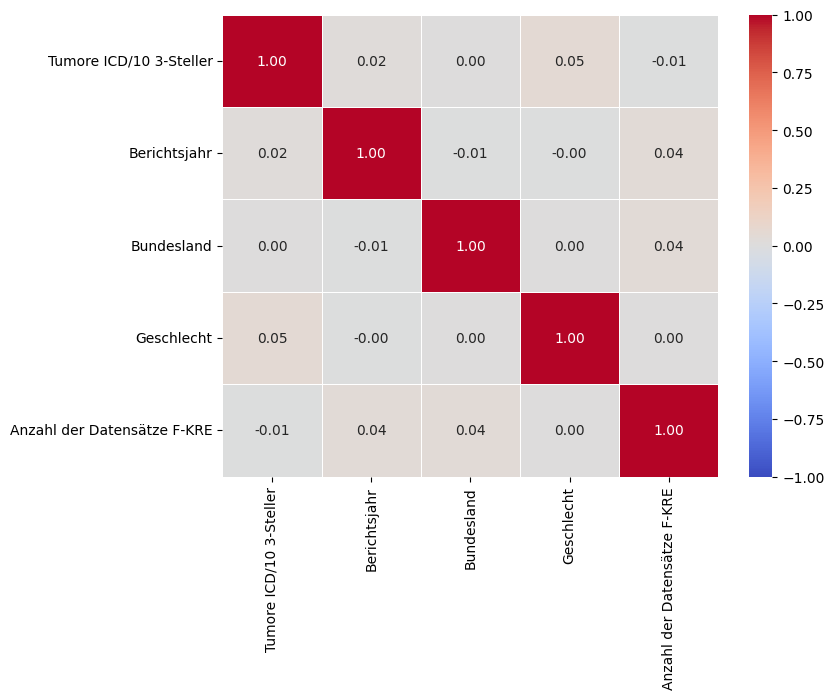

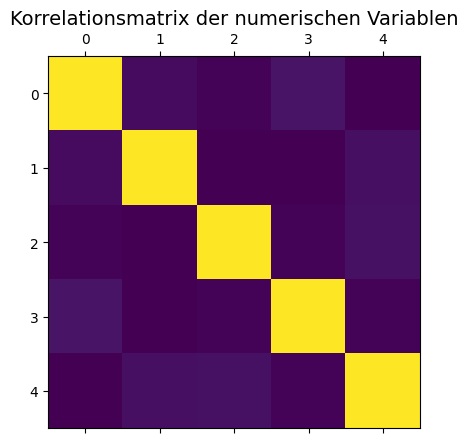

In [21]:
# Calculate correlations
# correlation_matrix = numeric_data.corr()

cancer_data_encoded = cancer_data.copy()
cancer_data_encoded['Geschlecht'] = cancer_data['Geschlecht'].astype('category').cat.codes
cancer_data_encoded['Bundesland'] = cancer_data['Bundesland'].astype('category').cat.codes
cancer_data_encoded['Tumore ICD/10 3-Steller'] = cancer_data['Tumore ICD/10 3-Steller'].astype('category').cat.codes

correlation_matrix = cancer_data_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    vmin=-1, vmax=1
)

plt.matshow(correlation_matrix)

plt.title('Korrelationsmatrix der numerischen Variablen', fontsize=14)
plt.tight_layout()
plt.show()

### Korrelationen zwischen den Variablen:

Berichtsjahr und Anzahl der Datensätze F-KRE haben eine leichte positive Korrelation (~0.04). Das bedeutet, dass die Anzahl der Datensätze im Laufe der Jahre minimal gestiegen sein könnte.
Tumore ICD/10 3-Steller hat nahezu keine Korrelation mit den anderen Variablen.
Bundesland, Geschlecht und Anzahl der Datensätze F-KRE zeigen ebenfalls keine nennenswerte Korrelation (Werte nahe 0).

### Nahezu keine starken Korrelationen:

Generell sind alle Korrelationen (außer der Diagonale) sehr niedrig, was darauf hindeutet, dass die untersuchten Variablen weitgehend unabhängig voneinander sind.

## Pairplot

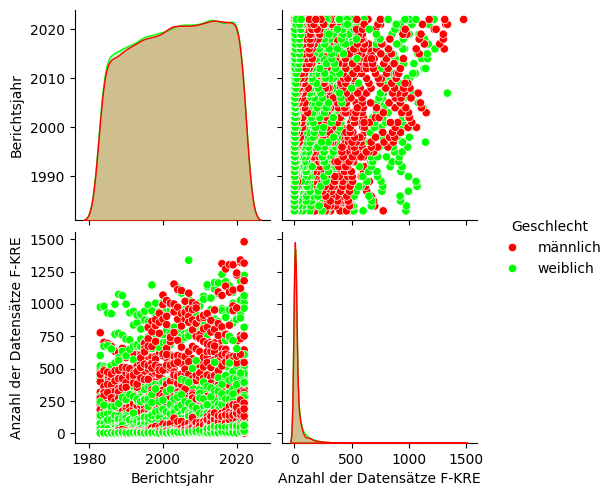

In [22]:
# Pairplot of the data cancer_data
sns.pairplot(cancer_data, hue='Geschlecht')

1. **Zeitliche Entwicklung (oben links):** Ein deutlicher Anstieg der Berichtsjahre von 1980 bis etwa 2020, mit abruptem Ende.
2. **Geschlechterverteilung über Zeit (oben rechts):** Eine relativ gleichmäßige Verteilung zwischen männlich (blau) und weiblich (orange) über die Jahre.
3. **Datensatzanzahl vs. Jahr (unten links):** Die Anzahl der F-KRE Datensätze streut zwischen 0 und etwa 1500, mit einer leichten Zunahme der Streuung über die Zeit.
4. **Häufigkeitsverteilung (unten rechts):** Die meisten Datensätze konzentrieren sich im unteren Bereich (0-300).

## Boxplot vs Violinplot inkl Subplots

### Boxplot

C:\Users\fabia\AppData\Local\Temp\ipykernel_30568\767495785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bundesland', y='Anzahl der Datensätze F-KRE', data=cancer_data, whis=[0, 99.99], palette='Set2')


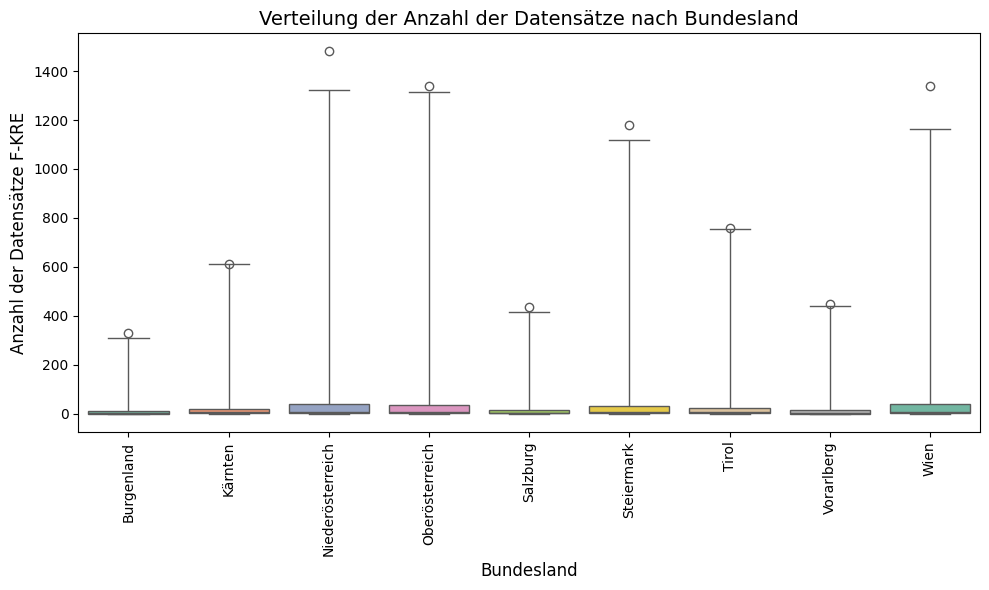

In [23]:
# Boxplot erstellen
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bundesland', y='Anzahl der Datensätze F-KRE', data=cancer_data, whis=[0, 99.99], palette='Set2')

# Achsentitel anpassen
plt.title('Verteilung der Anzahl der Datensätze nach Bundesland', fontsize=14)
plt.xlabel('Bundesland', fontsize=12)
plt.ylabel('Anzahl der Datensätze F-KRE', fontsize=12)

# X-Achsenbeschriftungen drehen
plt.xticks(rotation=90)

# Plot anzeigen
plt.tight_layout()
plt.show()

1. Alle Bundesländer haben ähnliche Medianwerte (mittlerer Strich der Box) nahe bei 0-50
2. Wien zeigt die größte Streuung im Interquartilsbereich (Box-Höhe)
3. Alle Bundesländer haben viele Ausreißer nach oben (Punkte), besonders Niederösterreich und Oberösterreich mit Werten bis ~1400
4. Die Verteilungen sind rechtschief (längerer oberer Whisker)

### Violinplot

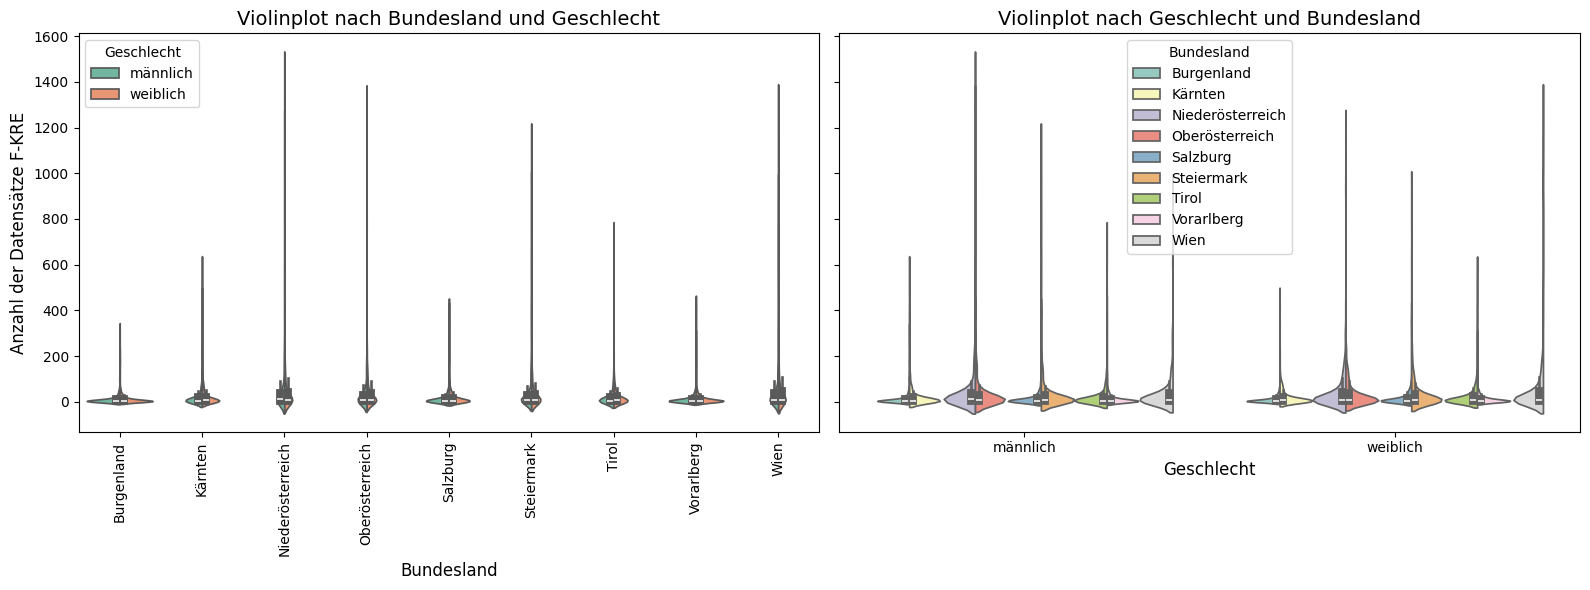

In [24]:
# Subplots erstellen
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Violinplot 1: Nach Bundesland und Geschlecht
sns.violinplot(
    x="Bundesland", 
    y="Anzahl der Datensätze F-KRE", 
    data=cancer_data, 
    hue="Geschlecht", 
    split=True, 
    palette="Set2", 
    ax=axes[0]
)
axes[0].set_title('Violinplot nach Bundesland und Geschlecht', fontsize=14)
axes[0].set_xlabel('Bundesland', fontsize=12)
axes[0].set_ylabel('Anzahl der Datensätze F-KRE', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Violinplot 2: Nach Geschlecht und Bundesland
sns.violinplot(
    x="Geschlecht", 
    y="Anzahl der Datensätze F-KRE", 
    data=cancer_data, 
    hue="Bundesland", 
    split=True, 
    palette="Set3", 
    ax=axes[1]
)
axes[1].set_title('Violinplot nach Geschlecht und Bundesland', fontsize=14)
axes[1].set_xlabel('Geschlecht', fontsize=12)
axes[1].set_ylabel('')  # Entfernen, da die y-Achse geteilt wird

# Layout anpassen
plt.tight_layout()
plt.show()

### Linker Violinplot:
* Verteilung nach Bundesländern:
In jedem Bundesland gibt es eine stark rechtsschiefe Verteilung. Das bedeutet, dass die meisten Datensätze eine niedrige Anzahl haben, während es einige wenige Fälle mit sehr hohen Werten (Ausreißer) gibt.
Besonders in Niederösterreich, Oberösterreich, Steiermark und Wien treten solche Ausreißer deutlich hervor.

### Rechter Violinplot:
* Verteilung nach Geschlechtern:
Die Verteilung ist für beide Geschlechter stark rechtsschief, was bedeutet, dass die Mehrheit der Datensätze niedrige Werte hat, unabhängig vom Geschlecht.
Männlich und weiblich zeigen keine großen Unterschiede in der Verteilung, was darauf hindeutet, dass Geschlecht keine große Rolle für die Anzahl der Datensätze spielt.
* Unterschiede nach Bundesland:
Die Farben im rechten Plot zeigen, dass die Ausreißer unabhängig vom Geschlecht auf bestimmte Bundesländer wie Wien, Niederösterreich und Steiermark zurückzuführen sind.

## Histogramme

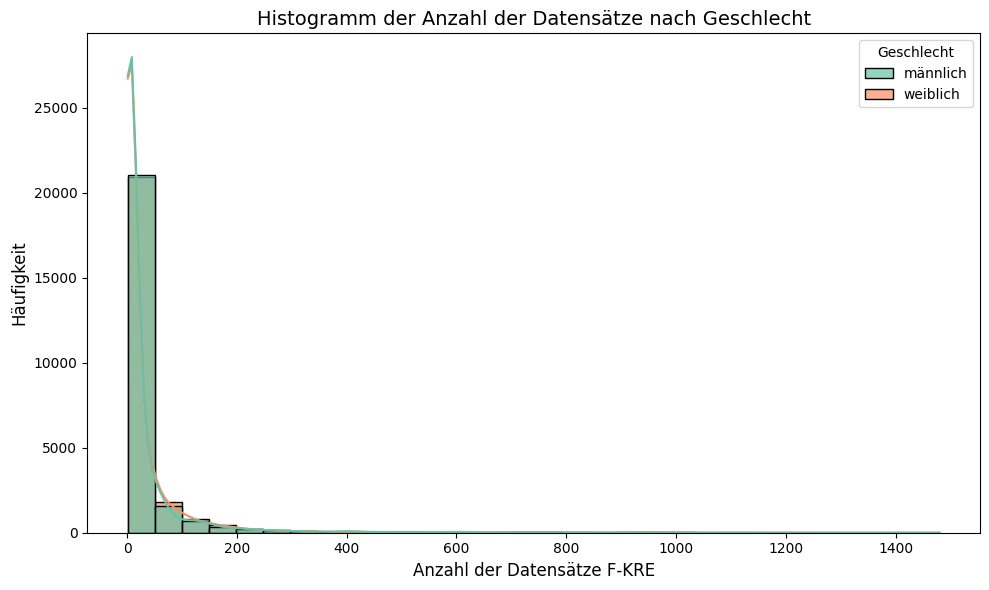

In [25]:
# Histogramm erstellen
plt.figure(figsize=(10, 6))  # Größe des Plots anpassen
sns.histplot(
    data=cancer_data, 
    x='Anzahl der Datensätze F-KRE', 
    hue='Geschlecht', 
    bins=30, 
    kde=True, 
    palette='Set2',  # Ästhetischere Farben
    alpha=0.7        # Leichte Transparenz für bessere Überlappungssichtbarkeit
)

# Titel und Achsentitel
plt.title('Histogramm der Anzahl der Datensätze nach Geschlecht', fontsize=14)
plt.xlabel('Anzahl der Datensätze F-KRE', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

# Plot anzeigen
plt.tight_layout()
plt.show()

1. **Starke Häufung bei kleinen Werten:**
Die meisten Werte liegen sehr nahe bei 0, was durch den hohen ersten Balken angezeigt wird. Das bedeutet, dass die Mehrheit der Datensätze sehr geringe Werte hat.
2. **Seltene höhere Werte:**
Die Frequenz sinkt sehr schnell mit steigenden Werten. Nur wenige Datensätze weisen Werte von 200 oder mehr auf.
3. **Ähnlichkeit zwischen den Geschlechtern:**
Die Verteilungen für männlich und weiblich sind sehr ähnlich, wobei die Häufigkeit für Männer (grüne Balken) etwas höher ist, was auf eine etwas größere Anzahl männlicher Datensätze hinweist.
4. **Rechts-schiefe Verteilung:**
Die Verteilung ist stark rechts-schief, da die meisten Werte im niedrigen Bereich konzentriert sind, während die höheren Werte selten auftreten.

## KDE

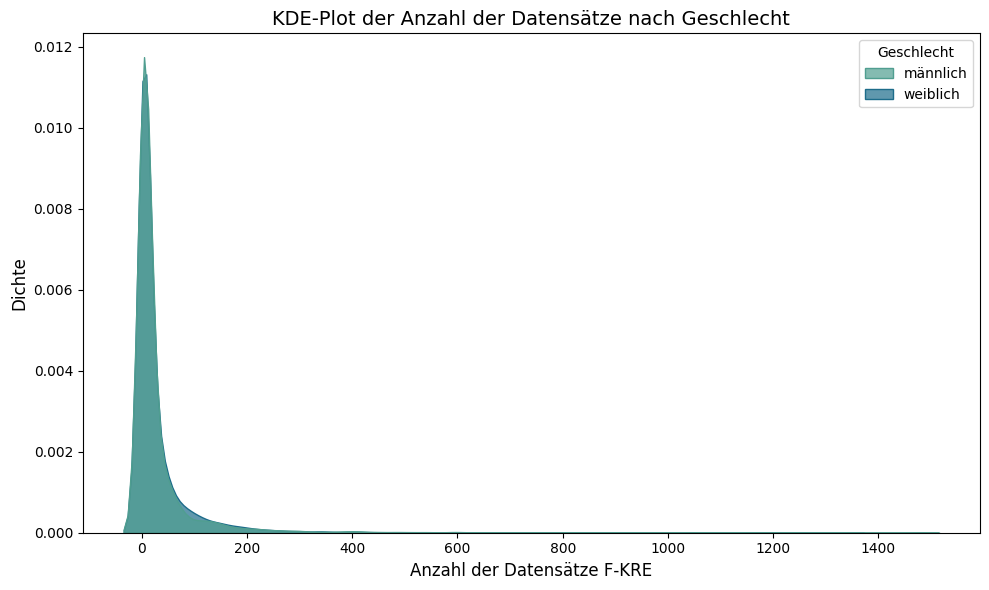

In [26]:
# KDE-Plot erstellen
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=cancer_data, 
    x='Anzahl der Datensätze F-KRE', 
    hue='Geschlecht',  # Vergleich nach Geschlecht
    fill=True,         # Gefüllte Kurven für bessere Visualisierung
    palette='crest',   # Farbpalette
    alpha=0.7          # Transparenz für Überlappung
)

# Titel und Achsenbeschriftungen
plt.title('KDE-Plot der Anzahl der Datensätze nach Geschlecht', fontsize=14)
plt.xlabel('Anzahl der Datensätze F-KRE', fontsize=12)
plt.ylabel('Dichte', fontsize=12)

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

1. **Höhepunkt der Dichte nahe 0:**
Der höchste Punkt liegt nahe bei 0, was bedeutet, dass die Mehrheit der Personen sehr niedrige Werte für die Anzahl der Datensätze hat.
2. **Abnehmende Dichte bei höheren Werten:**
Die Dichte sinkt schnell und erreicht nahe 200 fast 0. Werte über 200 kommen sehr selten vor.
3. **Rechts-schiefe Verteilung:**
Wie im Histogramm gezeigt, bestätigt auch dieser KDE-Plot, dass die Verteilung rechts-schief ist. Das bedeutet, dass die Werte stark auf kleinere Zahlen konzentriert sind.
4. **Ähnlichkeit der Verteilungen:**
Die beiden Geschlechter haben praktisch keine Unterschiede in der Verteilung, was darauf hinweist, dass es in dieser Kategorie keinen geschlechtsspezifischen Unterschied gibt.

## Scatterplots

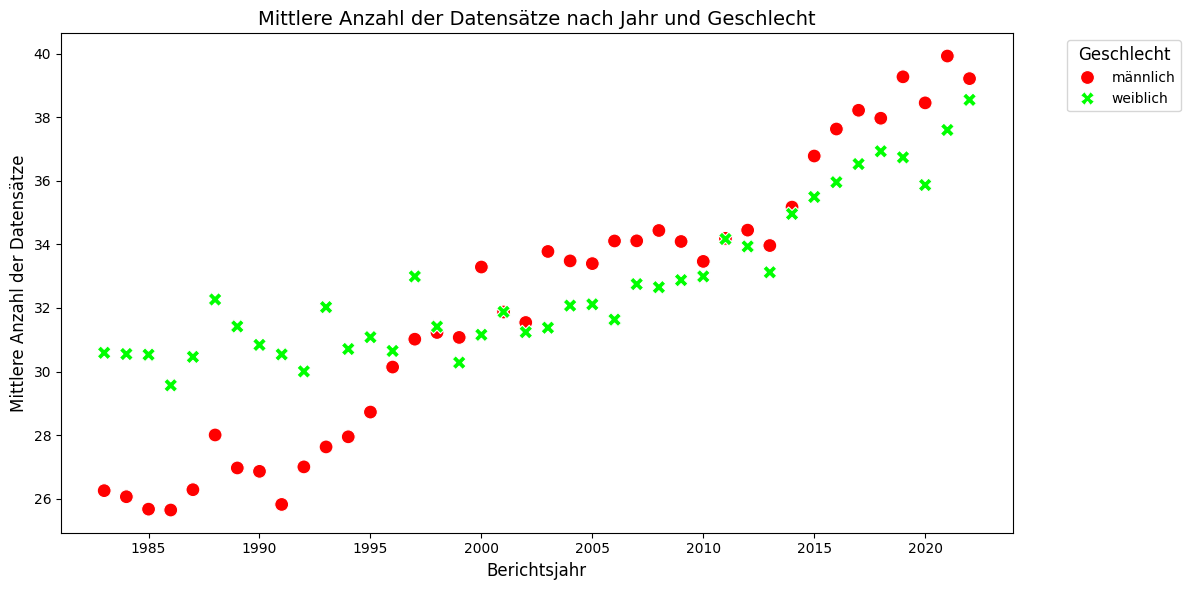

In [27]:
# Daten aggregieren
agg_data = cancer_data.groupby(['Berichtsjahr', 'Geschlecht'])['Anzahl der Datensätze F-KRE'].mean().reset_index()

# Scatterplot erstellen
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=agg_data,
    x='Berichtsjahr',
    y='Anzahl der Datensätze F-KRE',
    hue='Geschlecht',
    style='Geschlecht',  # Unterschiedliche Marker für Geschlechter
    s=100                # Größere Marker für bessere Sichtbarkeit
)

# Plot-Anpassungen
plt.title('Mittlere Anzahl der Datensätze nach Jahr und Geschlecht', fontsize=14)
plt.xlabel('Berichtsjahr', fontsize=12)
plt.ylabel('Mittlere Anzahl der Datensätze', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legende platzieren
plt.legend(title='Geschlecht', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Layout und Anzeige
plt.tight_layout()
plt.show()

1. **Steigende Trends**:
Sowohl für Männer als auch für Frauen nimmt die mittlere Anzahl der Datensätze im Laufe der Zeit zu.
Der Anstieg ist besonders ab dem Jahr 2000 deutlicher erkennbar.

2. **Unterschied zwischen Geschlechtern**:
Bis etwa 1995 haben Frauen eine leicht höhere mittlere Anzahl von Datensätzen als Männer.
Nach 2000 kehrt sich dieses Muster um, und die Werte für Männer übersteigen zunehmend die Werte für Frauen.

3. **Konsistenz innerhalb der Gruppen**:
Die Datenpunkte für beide Geschlechter zeigen innerhalb eines Jahres eine relativ geringe Streuung, was auf eine ähnliche Entwicklung innerhalb der Gruppen hinweist.

4. **Langfristige Entwicklung**:
Der Plot deutet darauf hin, dass gesellschaftliche oder systemische Veränderungen über die Zeit die Anzahl der Datensätze beeinflusst haben, wobei Männer in den letzten Jahren stärkere Zuwächse zeigen.

## Liniendiagramm

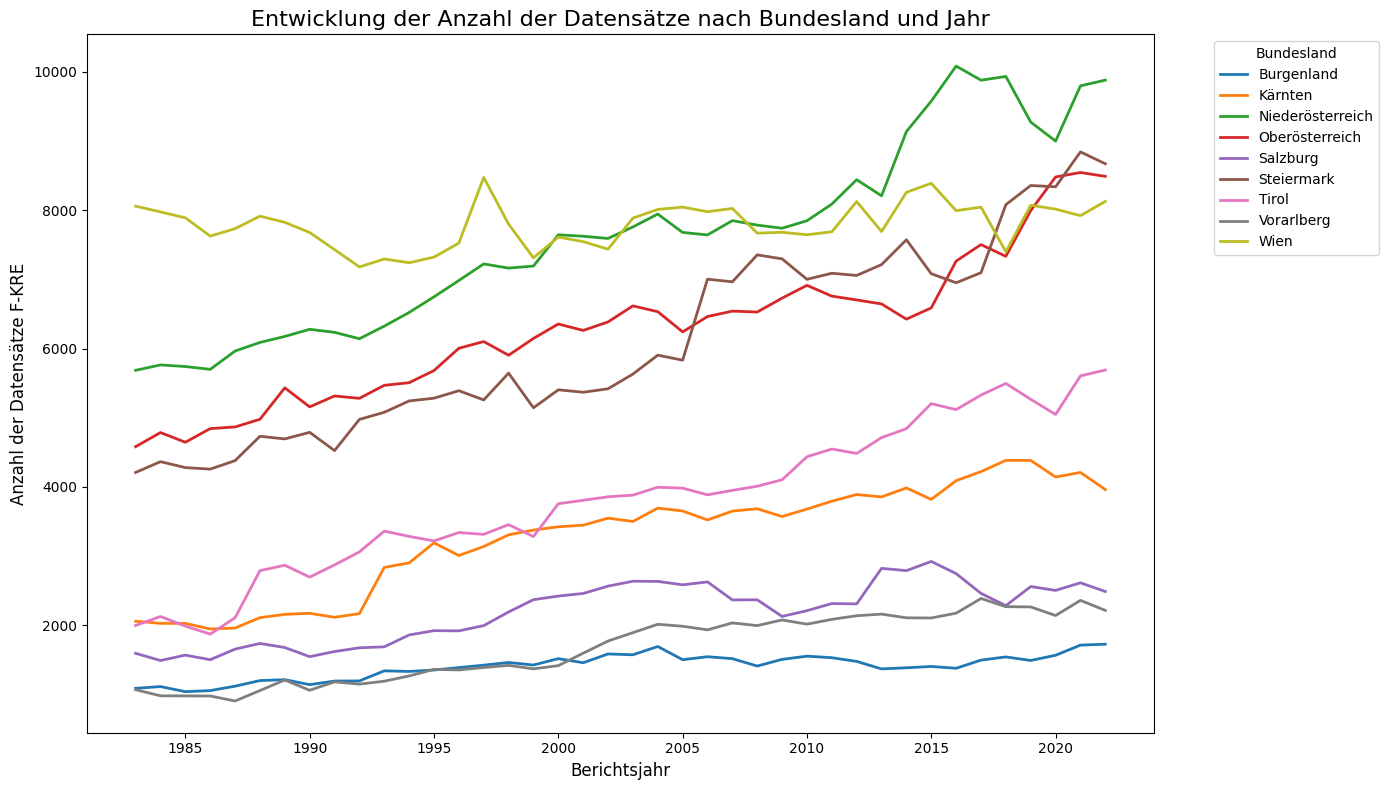

In [28]:
# Daten aggregieren
line_data = cancer_data.groupby(['Berichtsjahr', 'Bundesland'])['Anzahl der Datensätze F-KRE'].sum().reset_index()

# Liniendiagramm erstellen
plt.figure(figsize=(14, 8))  # Größerer Plot für bessere Übersicht
sns.lineplot(
    data=line_data, 
    x='Berichtsjahr', 
    y='Anzahl der Datensätze F-KRE', 
    hue='Bundesland', 
    palette='tab10',   # Farbschema für gute Unterscheidung
    linewidth=2        # Dickere Linien für bessere Sichtbarkeit
)

# Titel und Achsenbeschriftungen
plt.title('Entwicklung der Anzahl der Datensätze nach Bundesland und Jahr', fontsize=16)
plt.xlabel('Berichtsjahr', fontsize=12)
plt.ylabel('Anzahl der Datensätze F-KRE', fontsize=12)

# Legende außerhalb des Plots platzieren
plt.legend(title='Bundesland', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

1. **Langfristige Trends:**
Wien (gelbe Linie) und Niederösterreich (grüne Linie) zeigen die höchsten Werte und einen starken Anstieg über die Jahre. Wien hat im Verlauf der Zeit die meisten Datensätze.
Oberösterreich (rote Linie) und Steiermark (braune Linie) folgen als zweitstärkste Bundesländer mit einem konstanten, aber weniger steilen Anstieg.
Burgenland (blaue Linie) und Kärnten (graue Linie) haben die niedrigsten Werte und bleiben über die Zeit relativ konstant.

2. **Zeitliche Entwicklung:**
Ein allgemeiner Anstieg ist in fast allen Bundesländern zu erkennen, wobei die Zunahme in einigen Regionen (z. B. Wien und Niederösterreich) deutlicher ist als in anderen.
Ab den 2000er-Jahren verstärken sich die Unterschiede zwischen den Bundesländern, wobei die großen Städte und Ballungsräume (z. B. Wien) deutlich mehr Datensätze aufweisen.

3. **Unterschiede zwischen Bundesländern:**
Bundesländer wie Wien und Niederösterreich dominieren, vermutlich aufgrund ihrer größeren Bevölkerungsdichte oder ihrer zentralen Rolle in der Datenerfassung.
Die ländlicheren Regionen (z. B. Burgenland, Kärnten) weisen geringere Zahlen auf, was auf geringere Datenmengen oder kleinere Populationen hinweisen könnte.

## Balkendiagramm

C:\Users\fabia\AppData\Local\Temp\ipykernel_30568\3040418395.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


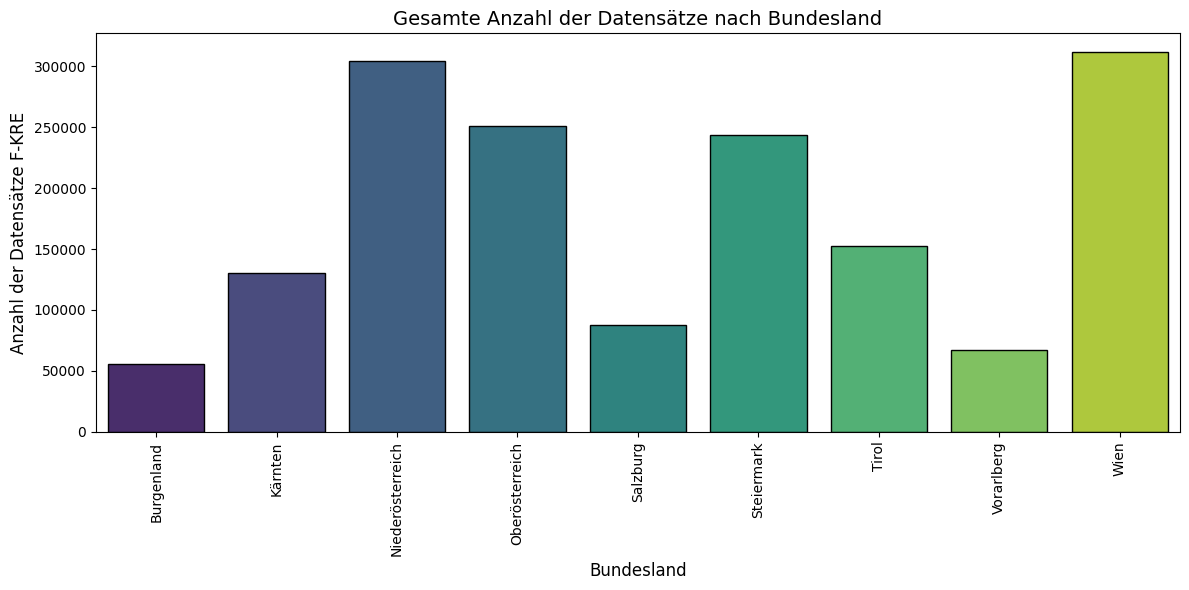

In [29]:
# Daten aggregieren
bar_data = cancer_data.groupby('Bundesland')['Anzahl der Datensätze F-KRE'].sum().reset_index()

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))  # Größerer Plot für bessere Übersicht
sns.barplot(
    data=bar_data, 
    x='Bundesland', 
    y='Anzahl der Datensätze F-KRE', 
    palette='viridis', 
    edgecolor='black'  # Schwarze Umrandung für die Balken
)

# Titel und Achsentitel
plt.title('Gesamte Anzahl der Datensätze nach Bundesland', fontsize=14)
plt.xlabel('Bundesland', fontsize=12)
plt.ylabel('Anzahl der Datensätze F-KRE', fontsize=12)

# Rotierte x-Achsen-Beschriftungen
plt.xticks(rotation=90, fontsize=10)

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

1. Wien und Niederösterreich haben mit etwa 300.000 bzw. 250.000 Datensätzen die höchsten Werte.
2. Burgenland und Vorarlberg weisen mit ca. 50.000 bzw. 65.000 die niedrigsten Zahlen auf.
3. Es gibt deutliche regionale Unterschiede - die östlichen Bundesländer (Wien, Niederösterreich) haben tendenziell mehr Datensätze als die westlichen (Vorarlberg, Tirol).